In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from combinators.inference import importance, mcmc
from combinators.kernel import kernel, mh
from combinators import utils

In [3]:
import examples.ais.ais_1d_gaussians as ais_example

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
target = ais_example.AnnealingTarget(annealing_steps=5, batch_shape=(100,))

In [6]:
ais = ais_example.annealed_importance(target, kernel.GaussianKernel('AnnealingTarget', 'X_0', scale=1.0, ), moves=5)

In [7]:
annealed_points, trace, log_weight = ais()
log_probs = utils.normalize_weights(log_weight)

In [8]:
import matplotlib.pyplot as plt
from torch.distributions import Normal

In [9]:
sample = torch.linspace(-10, 10, 100)
sample_probs = Normal(loc=torch.zeros(1), scale=torch.ones(1)).log_prob(sample).exp()

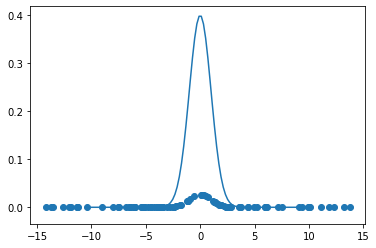

In [10]:
plt.scatter(annealed_points.detach().numpy(), log_weight.exp())
plt.plot(sample.detach().numpy(), sample_probs.detach().numpy())

In [11]:
annealed_points

tensor([ 11.1424,   6.0071,  -2.4243,  -3.7292,   7.1299,  -2.5119,   2.3438,
          1.8765,  -4.5342,   1.8949,   7.5051,  -7.9953,  -6.4536,   4.4170,
        -11.3497,  -2.2675,  -5.0313,   2.8545,   1.3482,  -3.5002,  -0.5614,
          6.0857,  -3.9470,   4.9719,   5.1899,   3.5459,  -9.0538,   2.2259,
          1.9306,   1.8330,  -4.4918,   0.1950,   1.1893,  11.8133,  -3.4602,
         -6.5864,  -1.8046,  -5.3967,  -0.9779,   2.5992,   0.1039,  12.3156,
          4.4152,  -3.4345,   9.1053,  -1.1788, -11.2974,   1.4329,   3.7488,
         -5.9902,  -3.9413,   0.5552,   2.7307,   1.3454,   9.8923,   2.6521,
        -14.2315,  -5.4692,  -1.8828,   1.2565,  13.2325,   0.3466,  -6.1214,
         -1.1470,  -3.9621,  -2.8041,  -3.6788,   2.4183,  -6.0297,   5.9824,
         -6.8070,  -7.4572,  -6.3897,   1.6424,  -7.5609,  -2.4244,  10.0746,
          3.6362,  -3.0313,  -4.7621,   6.1726,  -2.2560,   2.5014, -12.0967,
          2.5660, -11.8788,  13.7591,  -1.1199, -11.2391,   9.36

In [12]:
log_probs.exp()

tensor([1.6700e-29, 7.5464e-10, 4.1642e-03, 6.7209e-05, 3.8539e-13, 3.3345e-03,
        5.0722e-03, 1.3972e-02, 2.2021e-06, 1.3484e-02, 2.2922e-14, 4.6184e-16,
        4.3259e-11, 3.7763e-06, 1.5209e-30, 6.0773e-03, 1.9125e-07, 1.2961e-03,
        3.3536e-02, 1.5736e-04, 7.2581e-02, 4.6312e-10, 2.8460e-05, 2.5961e-07,
        8.3162e-08, 1.3337e-04, 4.3335e-20, 6.6889e-03, 1.2571e-02, 1.5182e-02,
        2.6809e-06, 8.3692e-02, 4.1259e-02, 6.1061e-33, 1.8156e-04, 1.7759e-11,
        1.6010e-02, 2.6986e-08, 5.2207e-02, 2.6506e-03, 8.4871e-02, 1.2035e-35,
        3.8067e-06, 1.9889e-04, 2.6802e-20, 4.1788e-02, 2.7953e-30, 2.9710e-02,
        6.2335e-05, 8.3752e-10, 2.9126e-05, 7.2843e-02, 1.8493e-03, 3.3668e-02,
        1.2342e-23, 2.2982e-03, 0.0000e+00, 1.8004e-08, 1.3805e-02, 3.7917e-02,
        7.1218e-41, 8.0233e-02, 3.7016e-10, 4.3406e-02, 2.6765e-05, 1.5007e-03,
        8.1421e-05, 4.2270e-03, 6.5600e-10, 8.7839e-10, 3.8927e-12, 3.3136e-14,
        6.5950e-11, 2.1336e-02, 1.4878e-

In [13]:
importance_points, _, resampled_weights = target(t=4)
resampled_probs = utils.normalize_weights(resampled_weights)

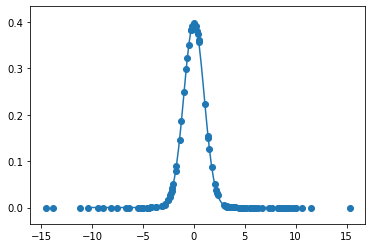

In [14]:
plt.scatter(importance_points.detach().numpy(), resampled_weights.exp())
plt.plot(sample.detach().numpy(), sample_probs.detach().numpy())